In [ ]:
"""
CNN that aims to classify CIFAR10 dataset accurately.
Learns low-level features of images using convolutional layers.
"""

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


# Load cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
input_shape = (32, 32, 3) # 32*32 pixels, 3 channels (rgb)
num_classes = 10

# Normalize inputs
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# Encode target labels via one-hot-encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Build model and add layers
model = Sequential([
    Conv2D(16, (3,3), input_shape=input_shape, activation='relu', name='1'), # shape=(30,30,16)
    BatchNormalization(name='2'),
    MaxPool2D((2,2), name='3'), # shape=(15,15,16)
    Conv2D(32, (5,5), activation='relu', name='4'), # shape=(11,11,32)
    BatchNormalization(name='5'),
    MaxPool2D((2,2), name='6'), # shape=(5,5,32)
    Flatten(name='7'), # shape=(800)
    Dropout(0.5, name='8'),
    Dense(512, name='9'),
    Activation('relu', name='10'),
    Dense(128, name='11'),
    BatchNormalization(name='12'),
    Activation('relu', name='13'),
    Dropout(0.2, name='14'),
    Dense(64, name='15'),
    Activation('relu', name='16'),
    Dense(num_classes, name='17'), # output layer
    BatchNormalization(name='18'),
    Activation('softmax', name='19') # softmax activation gives a probability for each class
], name='cnn1')
print(model.summary())


# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train model
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
hist = model.fit(X_train, y_train, batch_size=100, epochs=100, 
                 callbacks=[reduce_lr, early_stopping], 
                 validation_data=(X_test, y_test))


# Use model to predict target labels
y_probs = model.predict(X_test) # array of probabilities for each class for each sample
# Select highest probability as predicted y value
y_hat = np.argmax(y_probs, axis=1) # predicted class labels
y = np.argmax(y_test, axis=1) # actual class labels


Model: "cnn1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1 (Conv2D)                   (None, 30, 30, 16)        448       
_________________________________________________________________
2 (BatchNormalization)       (None, 30, 30, 16)        64        
_________________________________________________________________
3 (MaxPooling2D)             (None, 15, 15, 16)        0         
_________________________________________________________________
4 (Conv2D)                   (None, 11, 11, 32)        12832     
_________________________________________________________________
5 (BatchNormalization)       (None, 11, 11, 32)        128       
_________________________________________________________________
6 (MaxPooling2D)             (None, 5, 5, 32)          0         
_________________________________________________________________
7 (Flatten)                  (None, 800)               0      

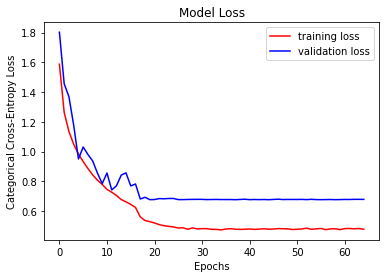

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1000
           1       0.89      0.87      0.88      1000
           2       0.78      0.63      0.70      1000
           3       0.61      0.57      0.59      1000
           4       0.73      0.74      0.74      1000
           5       0.66      0.72      0.69      1000
           6       0.81      0.84      0.83      1000
           7       0.80      0.83      0.82      1000
           8       0.87      0.87      0.87      1000
           9       0.81      0.87      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Confusion Matrix: (x: true class, y: predicted class)
[[819  13  25  15  14   3   8  10  56  37]
 [  8 871   1   5   3   7   9   3  17  76]
 [ 73   2 631  50  73  62  58  31   8  12]
 [ 16   7  39 573  61 188  51  32  

In [ ]:
""" Results Analysis """
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix

# Plot loss function
plt.plot(hist.history['loss'], label='training loss', color='#ff0000')
plt.plot(hist.history['val_loss'], label='validation loss', color='#0000ff')
plt.title('Model Loss')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


# Classification metrics
print("Classification Report:")
print(classification_report(y, y_hat))

cm = confusion_matrix(y, y_hat)
print("Confusion Matrix: (x: true class, y: predicted class)")
print(cm)

bac = balanced_accuracy_score(y, y_hat)
print("\nBalanced Acccuracy Score:", bac)
